In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# import Scaler
from sklearn.preprocessing import StandardScaler

In [3]:
## creat the dataframe

data = pd.read_csv('../Data/mobile_dataset.csv')

In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [5]:
data = data[['int_memory', 'mobile_wt', 'px_height', 'px_width','ram', 'battery_power', 'price_range']]
data

,int_memory,mobile_wt,px_height,px_width,ram,battery_power,price_range
0,7,188,20,756,2549,842,1
1,53,136,905,1988,2631,1021,2
2,41,145,1263,1716,2603,563,2
3,10,131,1216,1786,2769,615,2
4,44,141,1208,1212,1411,1821,1
...,...,...,...,...,...,...,...
1995,2,106,1222,1890,668,794,0
1996,39,187,915,1965,2032,1965,2
1997,36,108,868,1632,3057,1911,3
1998,46,145,336,670,869,1512,0


In [6]:
# let's separate the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop('price_range', axis=1),
                                                    data['price_range'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1400, 6), (600, 6))

In [7]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [9]:
X_test_scaled ## the new data set 

,int_memory,mobile_wt,px_height,px_width,ram,battery_power
0,0.118693,-1.598916,-0.921331,-0.538034,1.227246,0.496098
1,-1.133572,0.779978,-0.431105,-1.610612,-1.272116,-0.322940
2,-1.188019,0.978219,-1.137210,-1.659366,0.536706,0.654475
3,0.935388,-0.409469,-0.725690,0.276847,-0.182722,1.294773
4,0.608710,-0.805951,-1.357587,-0.266407,1.102371,-0.336515
...,...,...,...,...,...,...
595,0.173139,-0.551070,-0.624497,-0.085322,0.379215,-1.639735
596,0.772049,-1.598916,-0.824635,1.349426,0.863804,-0.225651
597,0.064247,-0.324509,0.475138,-0.503210,-1.300073,1.100195
598,0.009800,-0.919232,0.861922,1.015116,0.815345,-1.476832


## Plot The Data

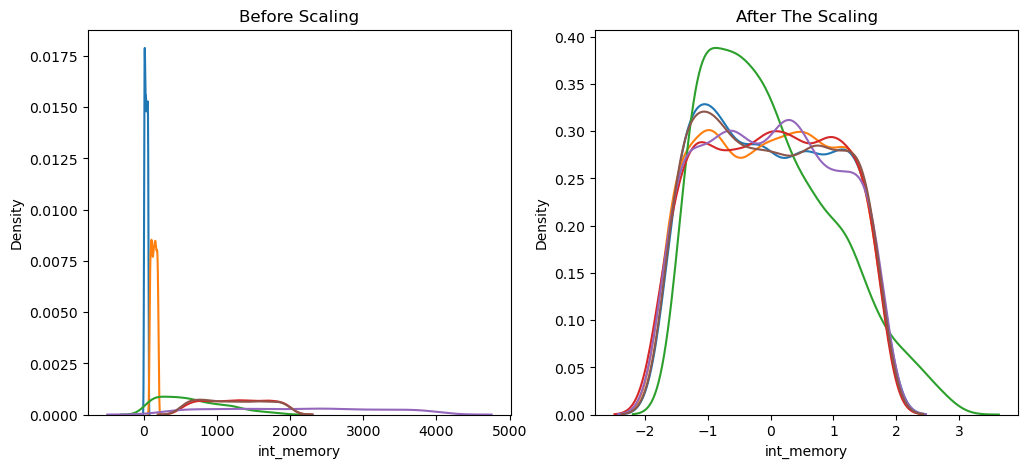

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['int_memory'], ax=ax1)
sns.kdeplot(X_train['mobile_wt'], ax=ax1)
sns.kdeplot(X_train['px_height'], ax=ax1)
sns.kdeplot(X_train['px_width'], ax=ax1)
sns.kdeplot(X_train['ram'], ax=ax1)
sns.kdeplot(X_train['battery_power'], ax=ax1)
## Before

ax2.set_title('After The Scaling')
sns.kdeplot(X_train_scaled['int_memory'], ax=ax2)
sns.kdeplot(X_train_scaled['mobile_wt'], ax=ax2)
sns.kdeplot(X_train_scaled['px_height'], ax=ax2)
sns.kdeplot(X_train_scaled['px_width'], ax=ax2)
sns.kdeplot(X_train_scaled['ram'], ax=ax2)
sns.kdeplot(X_train_scaled['battery_power'], ax=ax2)

plt.show()

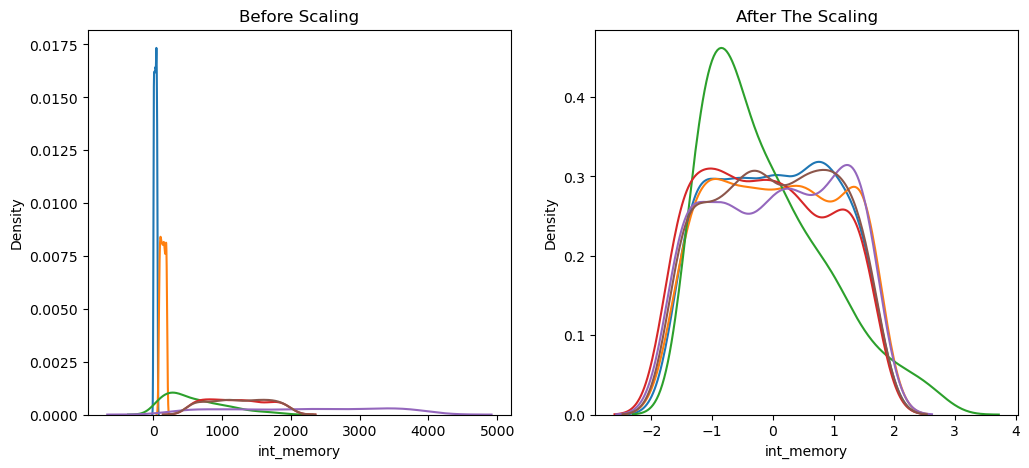

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_test['int_memory'], ax=ax1)
sns.kdeplot(X_test['mobile_wt'], ax=ax1)
sns.kdeplot(X_test['px_height'], ax=ax1)
sns.kdeplot(X_test['px_width'], ax=ax1)
sns.kdeplot(X_test['ram'], ax=ax1)
sns.kdeplot(X_test['battery_power'], ax=ax1)
## Before

ax2.set_title('After The Scaling')
sns.kdeplot(X_test_scaled['int_memory'], ax=ax2)
sns.kdeplot(X_test_scaled['mobile_wt'], ax=ax2)
sns.kdeplot(X_test_scaled['px_height'], ax=ax2)
sns.kdeplot(X_test_scaled['px_width'], ax=ax2)
sns.kdeplot(X_test_scaled['ram'], ax=ax2)
sns.kdeplot(X_test_scaled['battery_power'], ax=ax2)

plt.show()

## Bofore The Scaling

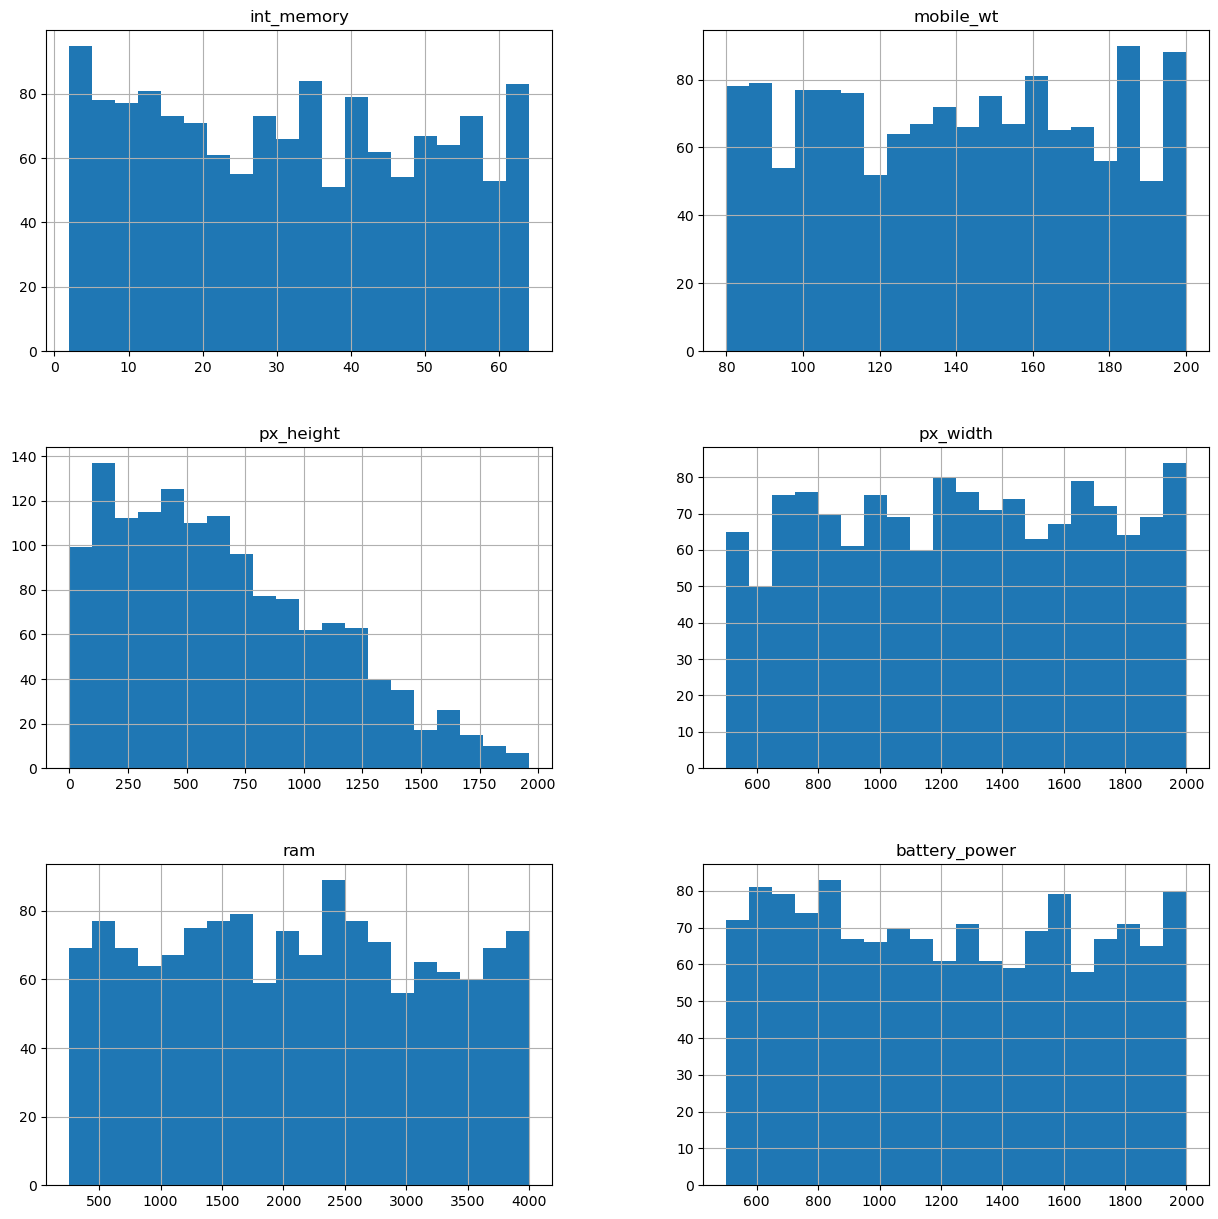

In [13]:
X_train.hist(bins=20, figsize=(15,15))
plt.show()

## After The Scalling

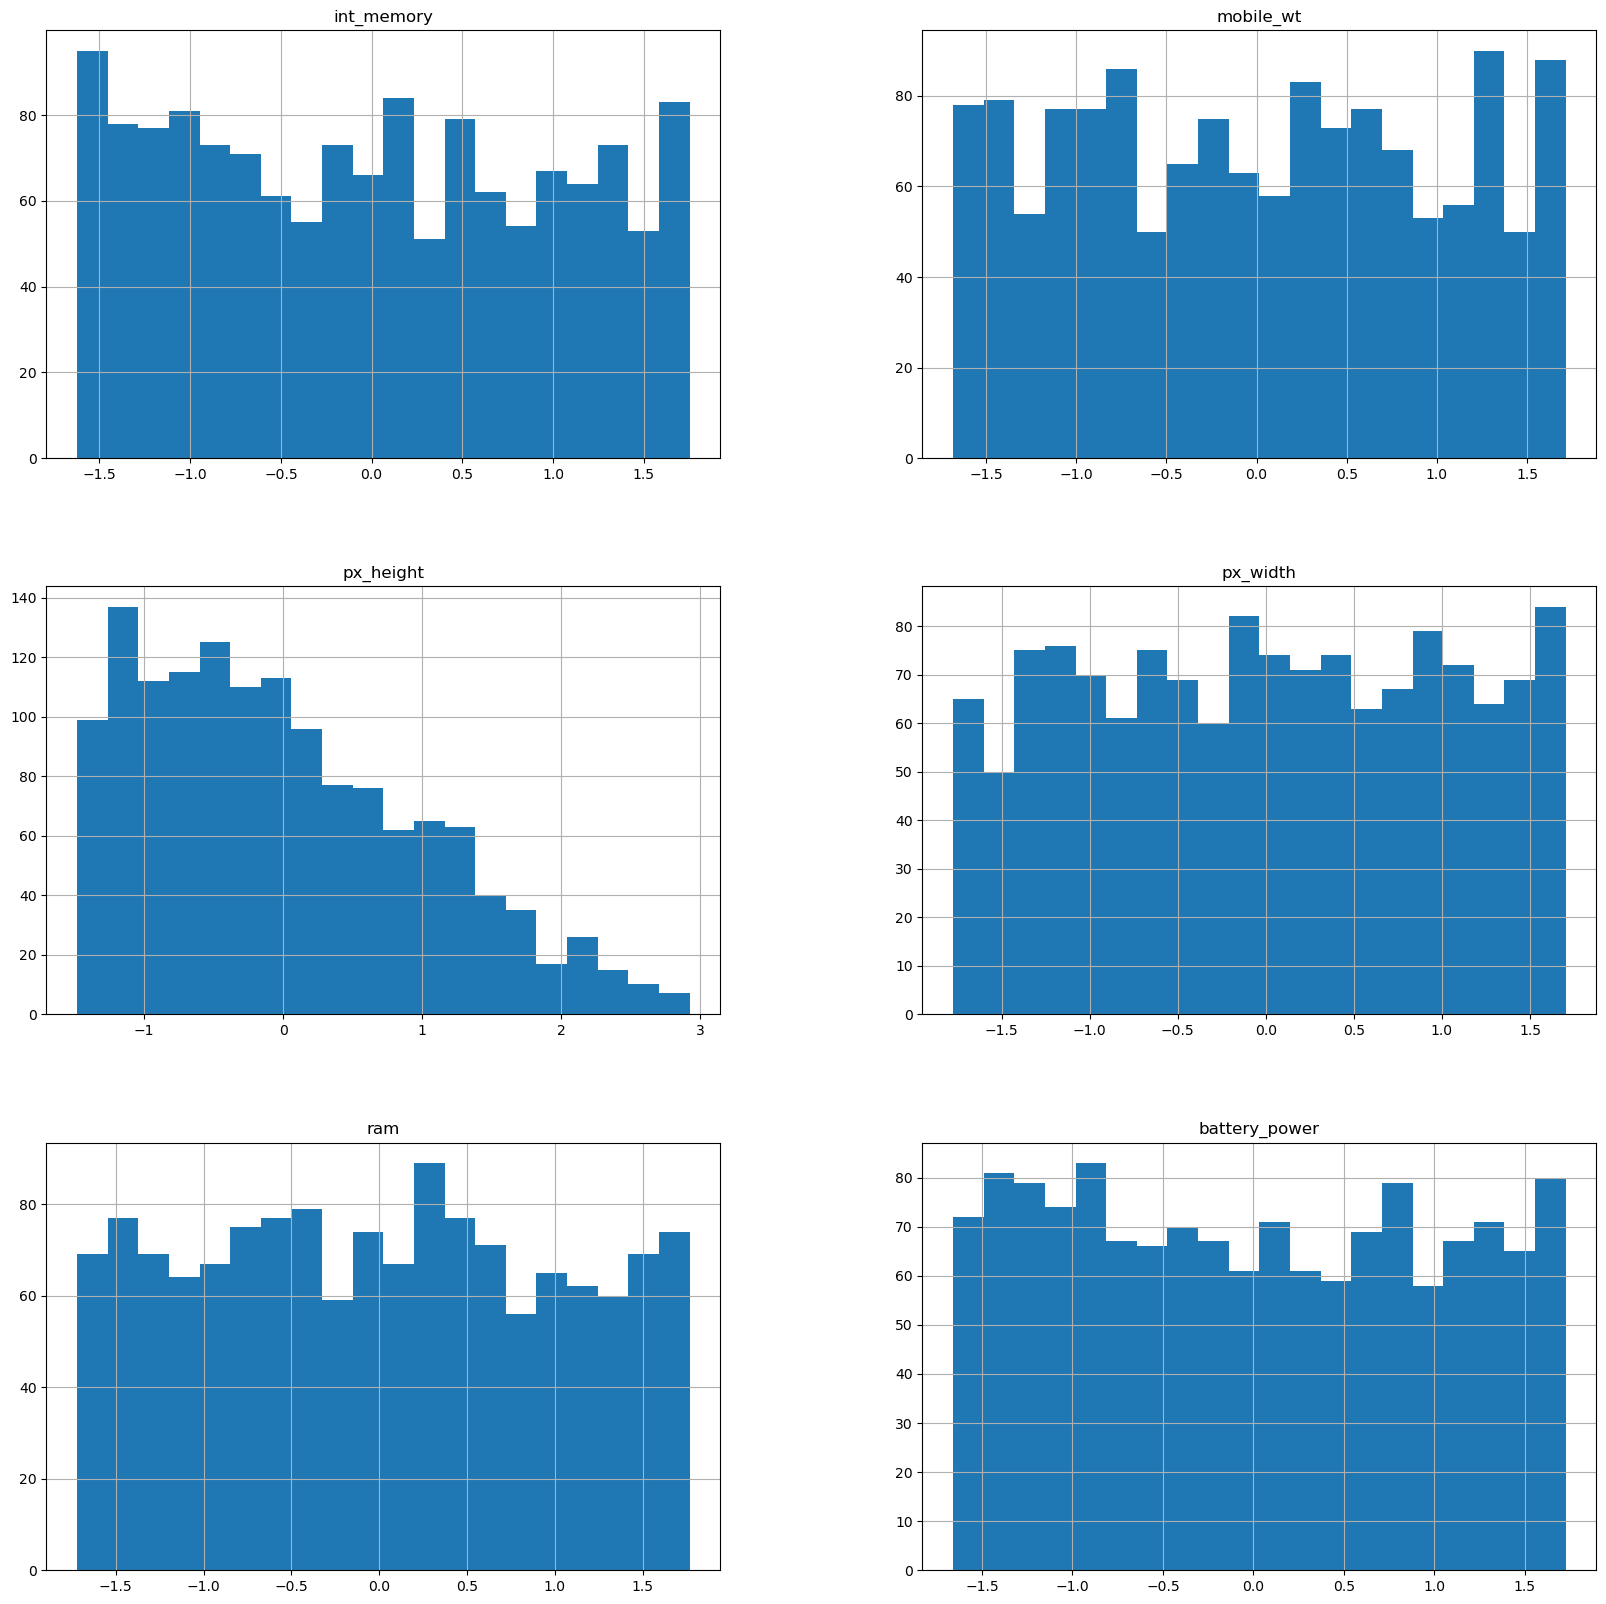

In [18]:
X_train_scaled.hist(bins=20, figsize=(20, 20))
plt.show()